To include deep learning regression models, we can extend the MultivariateRegressionAnalyzer class to include a neural network-based regression model using TensorFlow and Keras. Here, we’ll define an additional method to train a simple deep learning regression model using fully connected layers.

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

class MultivariateRegressionAnalyzer:
    def __init__(self, data, target_column, test_size=0.2, random_state=42):
        """
        Initialize with data and target column.

        Parameters:
        - data: pd.DataFrame, the dataset including features and target
        - target_column: str, name of the target variable column
        - test_size: float, proportion of data to use for testing
        - random_state: int, random seed for reproducibility
        """
        self.data = data
        self.target_column = target_column
        self.test_size = test_size
        self.random_state = random_state
        self.models = {}
        self.results = {}

        self.X = data.drop(columns=[target_column])
        self.y = data[target_column]

        # Split data into train and test sets
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            self.X, self.y, test_size=self.test_size, random_state=self.random_state
        )

    def fit_linear_regression(self):
        model = LinearRegression()
        model.fit(self.X_train, self.y_train)
        self.models['linear'] = model
        self.results['linear'] = self._evaluate_model(model)

    def fit_ridge_regression(self, alpha=1.0):
        model = Ridge(alpha=alpha)
        model.fit(self.X_train, self.y_train)
        self.models['ridge'] = model
        self.results['ridge'] = self._evaluate_model(model)

    def fit_lasso_regression(self, alpha=1.0):
        model = Lasso(alpha=alpha)
        model.fit(self.X_train, self.y_train)
        self.models['lasso'] = model
        self.results['lasso'] = self._evaluate_model(model)

    def fit_deep_learning_regression(self, epochs=100, batch_size=32, learning_rate=0.001):
        """
        Fit a deep learning regression model.

        Parameters:
        - epochs: int, number of epochs for training
        - batch_size: int, batch size for training
        - learning_rate: float, learning rate for the optimizer
        """
        model = Sequential([
            Dense(64, input_dim=self.X_train.shape[1], activation='relu'),
            Dense(32, activation='relu'),
            Dense(1)
        ])

        model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mse')
        model.fit(self.X_train, self.y_train, epochs=epochs, batch_size=batch_size, verbose=0)

        self.models['deep_learning'] = model
        self.results['deep_learning'] = self._evaluate_model(model, deep_learning=True)

    def _evaluate_model(self, model, deep_learning=False):
        """
        Evaluate the model on the test set.

        Parameters:
        - model: the fitted model to evaluate
        - deep_learning: bool, flag indicating if the model is a deep learning model

        Returns:
        - Dictionary containing evaluation metrics
        """
        if deep_learning:
            y_pred = model.predict(self.X_test).flatten()  # Flatten to 1D array for scoring
        else:
            y_pred = model.predict(self.X_test)

        mse = mean_squared_error(self.y_test, y_pred)
        r2 = r2_score(self.y_test, y_pred)

        return {'mean_squared_error': mse, 'r2_score': r2}

    def get_results(self):
        """
        Get the evaluation results of all models.

        Returns:
        - Dictionary of results for each model
        """
        return self.results

    def predict(self, model_type, X_new):
        """
        Make predictions using the specified model type.

        Parameters:
        - model_type: str, type of model ('linear', 'ridge', 'lasso', 'deep_learning')
        - X_new: pd.DataFrame, new data for prediction

        Returns:
        - Array of predictions
        """
        if model_type in self.models:
            if model_type == 'deep_learning':
                return self.models[model_type].predict(X_new).flatten()  # Flatten to match output format
            return self.models[model_type].predict(X_new)
        else:
            raise ValueError(f"Model '{model_type}' not found. Please fit the model first.")


In [2]:
# Sample usage with a dataset
data = pd.DataFrame({
    'feature1': np.random.rand(100),
    'feature2': np.random.rand(100),
    'target': np.random.rand(100)
})

analyzer = MultivariateRegressionAnalyzer(data, target_column='target')
analyzer.fit_linear_regression()
analyzer.fit_ridge_regression(alpha=1.0)
analyzer.fit_lasso_regression(alpha=1.0)
analyzer.fit_deep_learning_regression(epochs=100, batch_size=10, learning_rate=0.001)

results = analyzer.get_results()
print("Model Evaluation Results:", results)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Model Evaluation Results: {'linear': {'mean_squared_error': 0.09070883906019638, 'r2_score': 0.018374885699810717}, 'ridge': {'mean_squared_error': 0.09084682326998036, 'r2_score': 0.01688166004391911}, 'lasso': {'mean_squared_error': 0.09243279293255836, 'r2_score': -0.00028125006974266675}, 'deep_learning': {'mean_squared_error': 0.09174998605862025, 'r2_score': 0.00710789064265982}}


<ipython-input-2-50ed80ac80d1>:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  time_index = pd.date_range(start='2020-01-01', periods=24, freq='M')


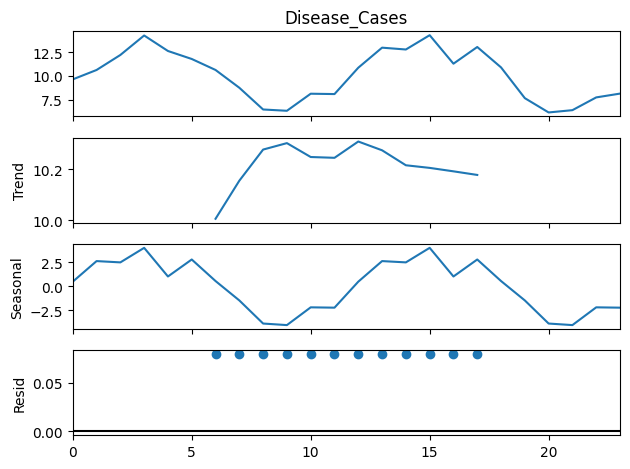

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Generate synthetic monthly disease data with seasonal pattern
time_index = pd.date_range(start='2020-01-01', periods=24, freq='M')
disease_cases = 10 + 3 * np.sin(2 * np.pi * np.arange(24) / 12) + np.random.normal(0, 1, 24)
df = pd.DataFrame({'Month': time_index, 'Disease_Cases': disease_cases})

# Seasonal decomposition using statsmodels
decomposition = sm.tsa.seasonal_decompose(df['Disease_Cases'], model='additive', period=12)
decomposition.plot()
plt.show()
